In [1]:
import pandas as pd
import datetime as dt

In [2]:
tfl_df = pd.read_csv('tfl-daily-cycle-hires.csv')

In [3]:
tfl_df

,Day,Number of Bicycle Hires,Unnamed: 2
0,30/07/2010,6897.0,NaN
1,31/07/2010,5564.0,NaN
2,01/08/2010,4303.0,NaN
3,02/08/2010,6642.0,NaN
4,03/08/2010,7966.0,NaN
...,...,...,...
4076,26/09/2021,45120.0,NaN
4077,27/09/2021,32167.0,NaN
4078,28/09/2021,32539.0,NaN
4079,29/09/2021,39889.0,NaN


In [4]:
# Converting the 'Day' column type to datetime
tfl_df['Day']=pd.to_datetime(tfl_df['Day'], format='%d/%m/%Y')

In [17]:
tfl_df

,Month Year,Number of Bicycle Hires
0,2010-07,6897.0
1,2010-07,5564.0
2,2010-08,4303.0
3,2010-08,6642.0
4,2010-08,7966.0
...,...,...
4076,2021-09,45120.0
4077,2021-09,32167.0
4078,2021-09,32539.0
4079,2021-09,39889.0


In [5]:
# Sorting the values in ascending date order
tfl_df.sort_values('Day', inplace=True)

In [6]:
# Extracting the year and  month in the format YYYY-MM
tfl_df['Day']=tfl_df['Day'].dt.strftime('%Y-%m')

In [7]:
# Renaming the 'Day' column to 'Month / Year'
tfl_df.rename({'Day':'Month Year'}, axis=1, inplace=True)

In [8]:
# Dropping extra columns
tfl_df.drop('Unnamed: 2', axis=1, inplace=True)

In [9]:
tfl_df

,Month Year,Number of Bicycle Hires
0,2010-07,6897.0
1,2010-07,5564.0
2,2010-08,4303.0
3,2010-08,6642.0
4,2010-08,7966.0
...,...,...
4076,2021-09,45120.0
4077,2021-09,32167.0
4078,2021-09,32539.0
4079,2021-09,39889.0


In [10]:
# Grouping on the 'Month Year' column with the sum aggregation. Using tail to return the latest 12 months
# Final step is to reset the index so that 'Month Year' is not left as an index but returns to being a regular column
tfl_12_month = tfl_df.groupby(by='Month Year').sum().tail(12).reset_index()

In [11]:
tfl_12_month

,Month Year,Number of Bicycle Hires
0,2020-10,848233.0
1,2020-11,760245.0
2,2020-12,589091.0
3,2021-01,409761.0
4,2021-02,510806.0
5,2021-03,748233.0
6,2021-04,943328.0
7,2021-05,921413.0
8,2021-06,1183119.0
9,2021-07,1167625.0


## expanding

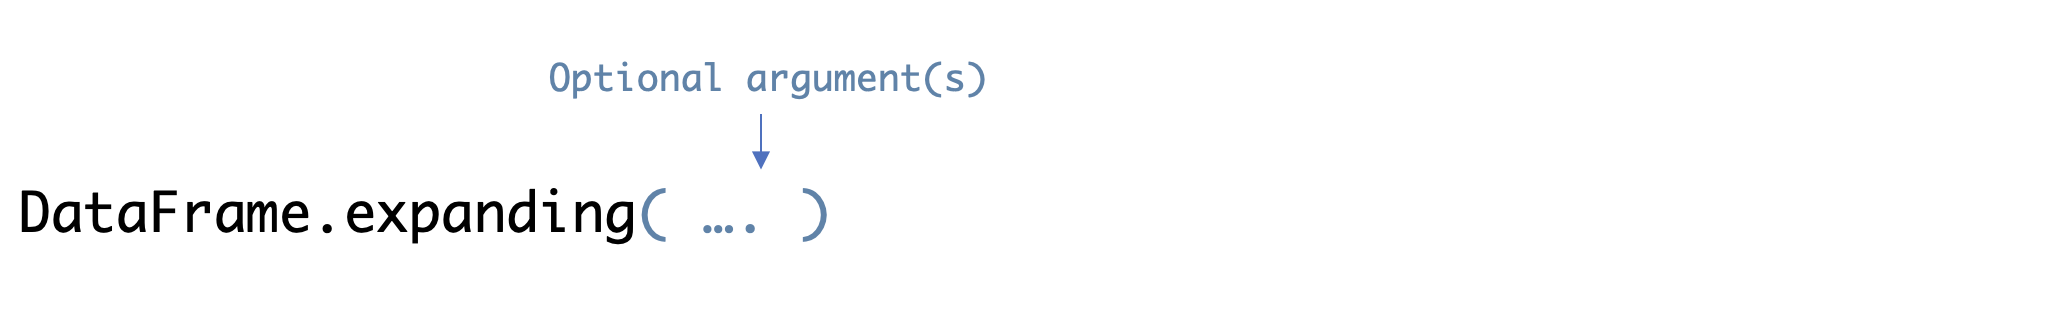

Accumulating window over the values

In [12]:
tfl_12_month['cumulative'] =  tfl_12_month['Number of Bicycle Hires'].expanding().sum()

In [13]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative
0,2020-10,848233.0,848233.0
1,2020-11,760245.0,1608478.0
2,2020-12,589091.0,2197569.0
3,2021-01,409761.0,2607330.0
4,2021-02,510806.0,3118136.0
5,2021-03,748233.0,3866369.0
6,2021-04,943328.0,4809697.0
7,2021-05,921413.0,5731110.0
8,2021-06,1183119.0,6914229.0
9,2021-07,1167625.0,8081854.0


## rolling

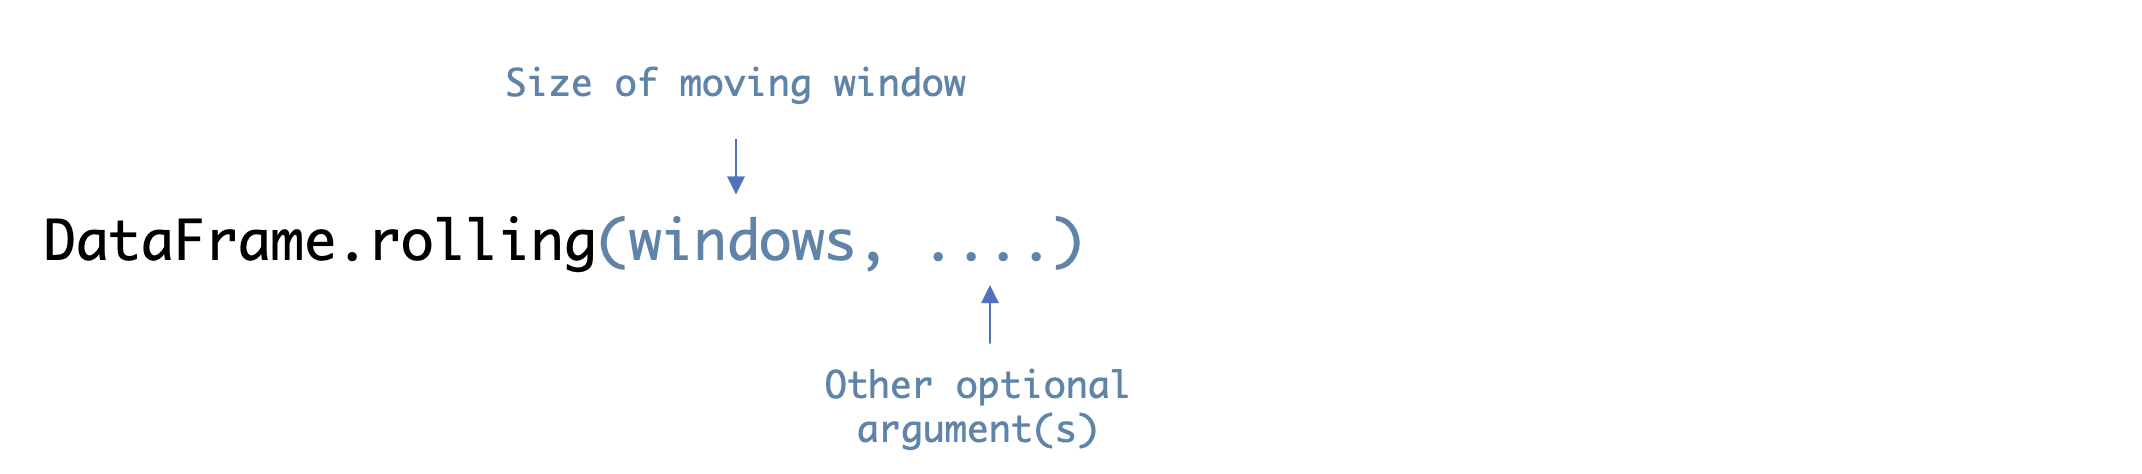

Generic fixed or variable sliding window over the values

In [14]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative
0,2020-10,848233.0,848233.0
1,2020-11,760245.0,1608478.0
2,2020-12,589091.0,2197569.0
3,2021-01,409761.0,2607330.0
4,2021-02,510806.0,3118136.0
5,2021-03,748233.0,3866369.0
6,2021-04,943328.0,4809697.0
7,2021-05,921413.0,5731110.0
8,2021-06,1183119.0,6914229.0
9,2021-07,1167625.0,8081854.0


In [18]:
tfl_12_month['Rolling Avg 3'] = tfl_12_month['Number of Bicycle Hires'].rolling(3).sum()

In [20]:
tfl_12_month

,Month Year,Number of Bicycle Hires,cumulative,Rolling Avg 3,Rolling Avg 6
0,2020-10,848233.0,848233.0,NaN,NaN
1,2020-11,760245.0,1608478.0,NaN,NaN
2,2020-12,589091.0,2197569.0,2197569.0,NaN
3,2021-01,409761.0,2607330.0,1759097.0,NaN
4,2021-02,510806.0,3118136.0,1509658.0,NaN
5,2021-03,748233.0,3866369.0,1668800.0,3866369.0
6,2021-04,943328.0,4809697.0,2202367.0,3961464.0
7,2021-05,921413.0,5731110.0,2612974.0,4122632.0
8,2021-06,1183119.0,6914229.0,3047860.0,4716660.0
9,2021-07,1167625.0,8081854.0,3272157.0,5474524.0


In [16]:
tfl_12_month['Rolling Avg 6'] = tfl_12_month['Number of Bicycle Hires'].rolling(6).sum()

# Links and resources:
* Windowing Operations: https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html
* expanding: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html
* rolling: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html